In [1]:
#Mount your google drive to fetch the stored data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import all necessary librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
import warnings
warnings.filterwarnings("ignore")

In [362]:
%%time
train = pd.read_csv('/content/drive/My Drive/Tweet/Tweet_train.csv')
test = pd.read_csv('/content/drive/My Drive/Tweet/Tweet_test.csv')
print(train.shape, test.shape)

(7920, 3) (1953, 2)
CPU times: user 27.6 ms, sys: 3.87 ms, total: 31.4 ms
Wall time: 36.4 ms


In [337]:
train.isnull().sum() # Checking for null values

id       0
label    0
tweet    0
dtype: int64

In [338]:
train=train.drop("id",axis=1)
train.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...


In [318]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [319]:
from nltk import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [320]:
'''from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split'''

'import re\nfrom sklearn.svm import LinearSVC\nfrom sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer\nfrom sklearn.linear_model import SGDClassifier\nfrom sklearn.model_selection import cross_val_score, train_test_split\nfrom sklearn.metrics import f1_score, accuracy_score'

In [321]:
train['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [322]:
def clean(text):
  text=text.lower()

  text= re.sub(r'@\S+', '',text) #remove twitter handles
  text= re.sub(r'http\S+', '',text) #remove Urls

  text= re.sub("\s[\s]+" , " ",text).strip()    # Regex removes repreated spaces, strip removes leading and trailing spaces !
  text_token = word_tokenize(text)  # Tokenize words
  

  # stop words do not add much meaning to a sentence
  stop_words = set(stopwords.words('english'))
  stop_words = [x.lower() for x in stop_words]
  words= [word for word in text_token if word not in stop_words]  # remove stop words

  words= pd.Series(words) # mapping the shortcuts
  shortcuts = {'u': 'you', 'y': 'why', 'r': 'are', 'doin': 'doing', 'hw': 'how', 'k': 'okay', 'm': 'am', 'b4': 'before',
            'idc': "i do not care", 'ty': 'thankyou', 'wlcm': 'welcome', 'bc': 'because', '<3': 'love', 'xoxo': 'love',
            'ttyl': 'talk to you later', 'gr8': 'great', 'bday': 'birthday', 'awsm': 'awesome', 'gud': 'good', 'h8': 'hate',
            'lv': 'love', 'dm': 'direct message', 'rt': 'retweet', 'wtf': 'hate', 'idgaf': 'hate',
             'irl': 'in real life', 'yolo': 'you only live once', 'ama' :'ask me anything', 'afaik' :'as far as I know', 'btw': 'by the way', 
             'fbf':'flashback friday', 'fomo':'fear of missing out', 'gg':'good game', 'lol': 'laughing out loud'}
  words= words.map(shortcuts).fillna(words) #Exhaustive mapping (some word are mapped; fill na with original words)

  words= [word.split(' ') for word in words]    #Get an integrated list of list_words (words like yolo must be combined)
  import itertools
  words= list(itertools.chain.from_iterable(words))
  
  words= [re.sub(r'[^a-zA-Z+]', '',word) for word in words] #keep alpha characters only
  words= [word for word in words if len(word)>2]  #Keep words with length>2 only

  def pos_tag(word):  #lemmatize the words to their roots "with POS Tag"
    tag= nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
  words = [WordNetLemmatizer().lemmatize(word, pos=pos_tag(word)) for word in words]   

  clean_text = " ".join(words)
  return clean_text 

In [323]:
clean("Hey their! runss yolo running #sportsGame better http://url.com/bla1/blah1/  because yo @rish ri56sh @ shouldn't above gr8 grr9 hy' I should've should've wouldn't a $ % 56 $$$| sup babay sup maaan786 maaan")

'hey run you only live once run sportsgame well rish great grr would sup babay sup maaan maaan'

In [324]:
train['tweet']=train['tweet'].apply(lambda x: clean(x))
test['tweet']=test['tweet'].apply(lambda x: clean(x))

In [325]:
# Importing data DF to My drive
#train.to_csv('/content/drive/My Drive/Tweet/Train_clean.csv', index=False)
#test.to_csv('/content/drive/My Drive/Tweet/Test_clean.csv', index=False)

In [121]:
train = pd.read_csv('/content/drive/My Drive/Tweet/Train_clean.csv')
test = pd.read_csv('/content/drive/My Drive/Tweet/Test_clean.csv')
train.head()

,label,tweet
0,0,fingerprint pregnancy test android apps beauti...
1,0,finally transparant silicon case thanks uncle ...
2,0,love would talk makememories unplug relax ipho...
3,0,wire know george make way iphone cute daventry...
4,1,amaze service apple even talk question unless ...


In [122]:
train.isnull().sum() # Checking for null values- 1 tweet almost removed , must be non-sense

label    0
tweet    1
dtype: int64

In [123]:
train= train[~train['tweet'].isnull()]
test= test[~test['tweet'].isnull()]

In [124]:
test_id= pd.Series(test['id'])
test= pd.Series(test['tweet'])

In [125]:
print(train.shape, test.shape)

(7919, 2) (1953,)


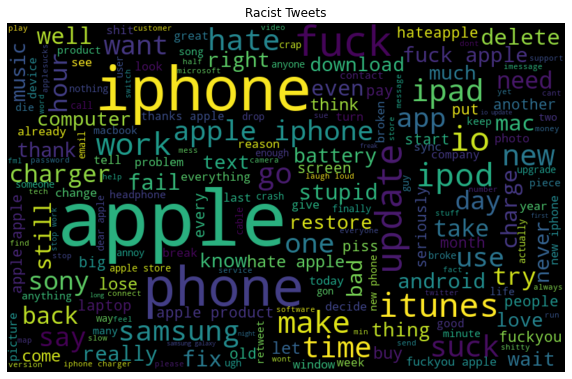

In [139]:
# Plot the wordcloud
racist= train[train['label']==1]
all_words = ' '.join([text for text in racist['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Racist Tweets')
plt.axis('off')
plt.show()

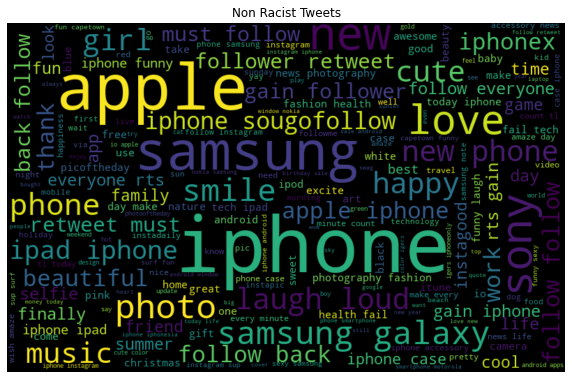

In [140]:
# Plot the wordcloud
racist_n= train[train['label']==0]
all_words = ' '.join([text for text in racist_n['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Non Racist Tweets')
plt.axis('off')
plt.show()

In [128]:
# Data split 
X= train['tweet']; y=train['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5939,) (5939,) (1980,) (1980,)


In [130]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(max_df=0.5, ngram_range=(1,3))
# vectorizer = TfidfVectorizer(ngram_range=(1,3), max_df=0.5)

X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

test_vect = vectorizer.transform(test)

In [208]:
from sklearn.svm import LinearSVC
m = LinearSVC(random_state=42, max_iter=1000)
params_ = {
     'penalty': ['l1','l2'],
     'loss': ['hinge', 'squared_hinge'],
     'dual': [bool, False, True],
         'C': [i/20 for i in range(1, 9, 1)]
}
model= RandomizedSearchCV(estimator=m, param_distributions=params_, n_iter = 30, 
                                cv = 5, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

In [205]:
'''from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)

params_ = {
     'n_estimators': [i for i in range(1,30)],
    'max_depth': [i for i in range(10, 16)],
    'gamma': [0.35, 0.5, 0.75, 1],
    'learning_rate': [0.25, 0.5, 0.75, 1], 
}
model= RandomizedSearchCV(estimator=xg, param_distributions=params_, n_iter = 20, 
                                cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)     '''

"from sklearn.model_selection import RandomizedSearchCV\nfrom xgboost import XGBClassifier\nxg = XGBClassifier(random_state=42)\n\nparams_ = {\n     'n_estimators': [i for i in range(1,30)],\n    'max_depth': [i for i in range(10, 16)],\n    'gamma': [0.35, 0.5, 0.75, 1],\n    'learning_rate': [0.25, 0.5, 0.75, 1], \n}\nmodel= RandomizedSearchCV(estimator=xg, param_distributions=params_, n_iter = 20, \n                                cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)     "

In [209]:
model.fit(X_train_vect,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=42, tol=0.0001, verbose=0),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3,
                                              0.35, 0.4],
                                        'dual': [<class 'bool'>, False, True],
                                        'loss': ['hinge', 'squared_hinge'],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring=None, verbose=2)

In [210]:
y_pred = model.predict(X_test_vect)

from sklearn.metrics import f1_score, accuracy_score
print('Accuracy:', accuracy_score(y_pred, y_test))
print("F1 Score: ", f1_score(y_pred, y_test))

Accuracy: 0.8828282828282829
F1 Score:  0.7698412698412699


In [211]:
model.best_params_  

{'C': 0.05, 'dual': True, 'loss': 'hinge', 'penalty': 'l2'}

# Final Predictions

In [212]:
test_pred = pd.Series(model.predict(test_vect))

In [142]:
'''sample = pd.read_csv('/content/drive/My Drive/Tweet/Tweet_sample_submission.csv')
sample.head()'''

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0


In [213]:
df_xg= pd.DataFrame({'id':test_id, 'label':test_pred})
df_xg.head()

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1


In [214]:
df_xg['label'].value_counts()


0    1463
1     490
Name: label, dtype: int64

In [215]:
# Importing data DF to My drive
df_xg.to_csv('/content/drive/My Drive/Tweet/Tweet_prediction_XGB.csv', index=False)